<a href="https://colab.research.google.com/github/dasigiraghu96/Deeplearning_Computer_Vision/blob/main/MNIST_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf
 Checklist=['GPU',"CPU"]
 for device in Checklist:
   out=tf.config.list_physical_devices(device)
   if len(out)>0:
     print(f"{device} is available")
     print('details\n',out)
   else:
     print(f"{device} is not available")

GPU is not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
mnist=tf.keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
# 60k, 28x28 matrices
x_train_full.dtype

dtype('uint8')

In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x_valid,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test/255
#255 is lat pixel value in RGB
print(x_valid.shape,x_train.shape)
print(y_valid.shape,y_train.shape)

(5000, 28, 28) (55000, 28, 28)
(5000,) (55000,)


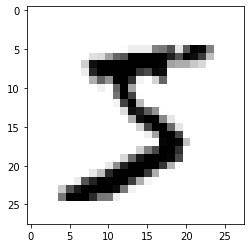

In [ ]:
plt.imshow(x_valid[0],cmap='binary')

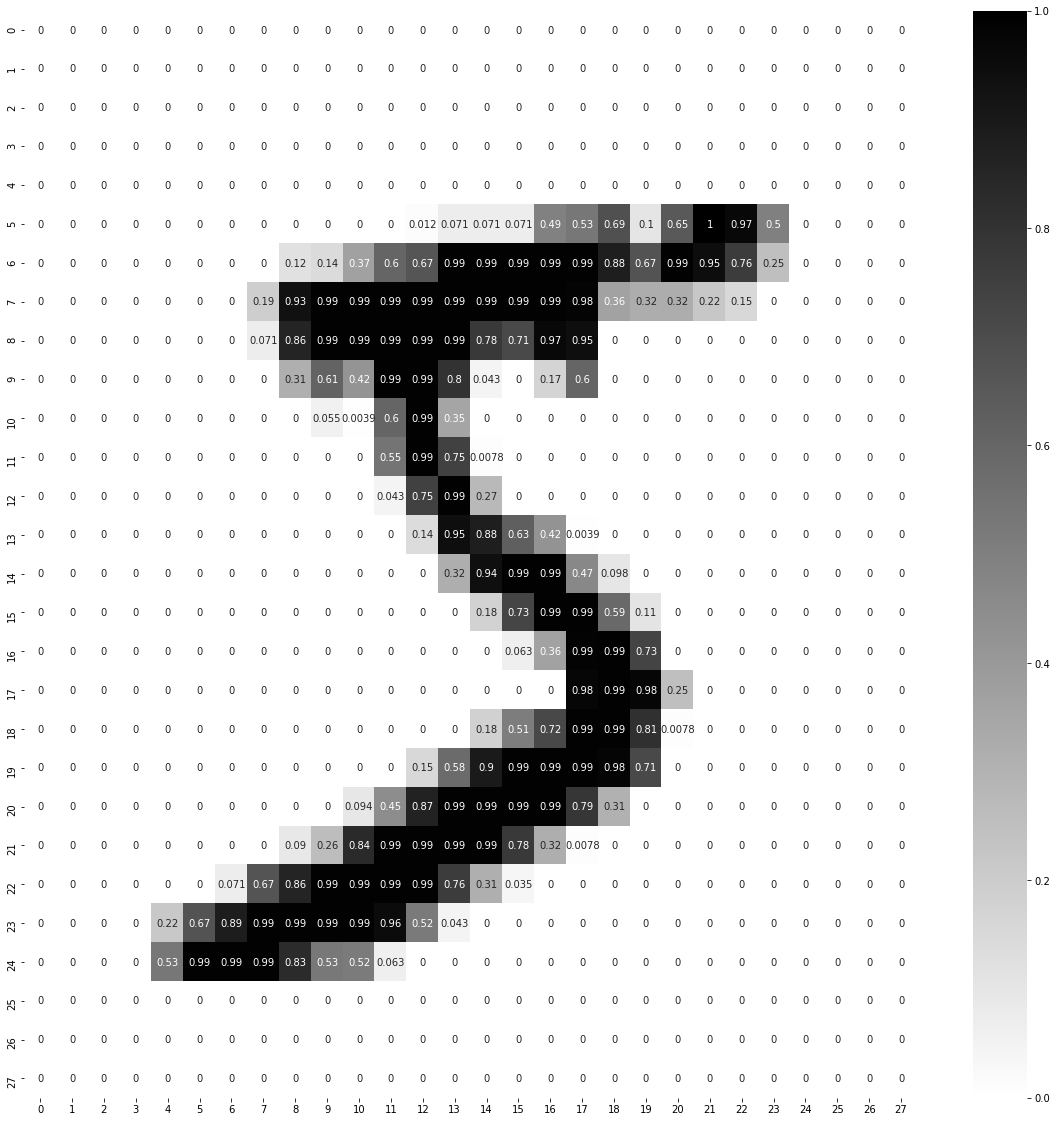

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(x_valid[0],annot=True,cmap='binary')

In [ ]:
layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='input_layer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]
model_clf=tf.keras.models.Sequential(layers)

In [ ]:
 model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#calculation of trainable params
#28*28=784(ip) flattening
#784(ip)*300(w)+300(b)
#300*100+100
#100*10+10

In [ ]:
hidden1=model_clf.layers[1]

In [ ]:
def model_clf2(activation,loss,optimizer):
  import tensorflow as tf
  model_clf2=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28],name='input_layer'),
        tf.keras.layers.Dense(300,activation=activation,name='hiddenlayer1'),
        tf.keras.layers.Dense(100,activation=activation,name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')])
  model_clf2.compile(loss=loss,
              optimizer=optimizer,
              metrics='accuracy')
  epochs=30
  validation_set=(x_valid,y_valid)
  early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
  history=model_clf2.fit(x_train,y_train,epochs=100,validation_data=validation_set,
                         callbacks=[early_stopping_cb])
  import pandas as pd
  table=pd.DataFrame(history.history)
  evaluation=model_clf2.evaluate(x_test,y_test)
  return table,evaluation
  

In [ ]:
model_clf2('sigmoid',tf.keras.losses.SparseCategoricalCrossentropy(),tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9))

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7282 - accuracy: 0.7598 - val_loss: 0.1733 - val_accuracy: 0.9500
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1620 - accuracy: 0.9500 - val_loss: 0.1228 - val_accuracy: 0.9638
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1061 - accuracy: 0.9679 - val_loss: 0.0891 - val_accuracy: 0.9724
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.0776 - val_accuracy: 0.9772
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0748 - val_accuracy: 0.9802
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0724 - val_ac

(        loss  accuracy  val_loss  val_accuracy
 0   0.393445  0.876018  0.173268        0.9500
 1   0.150894  0.953909  0.122760        0.9638
 2   0.101861  0.969000  0.089143        0.9724
 3   0.076274  0.976309  0.077643        0.9772
 4   0.059186  0.981945  0.074847        0.9802
 5   0.046473  0.985345  0.068632        0.9810
 6   0.035957  0.988473  0.072401        0.9794
 7   0.028206  0.991036  0.061609        0.9828
 8   0.020929  0.993545  0.070941        0.9810
 9   0.017973  0.994600  0.065464        0.9834
 10  0.012494  0.996545  0.063488        0.9842
 11  0.009287  0.997491  0.063789        0.9834
 12  0.006129  0.998782  0.068506        0.9832
 13  0.004997  0.999000  0.065919        0.9846
 14  0.003201  0.999564  0.069254        0.9836
 15  0.002203  0.999764  0.066214        0.9846
 16  0.001656  0.999873  0.067201        0.9848
 17  0.001255  0.999945  0.066085        0.9850,
 [0.06744758784770966, 0.9796000123023987])

In [ ]:
hidden1.name

'hiddenlayer1'

In [ ]:
hidden1.get_weights()

[array([[-0.02655105,  0.00561462, -0.00552233, ...,  0.0305851 ,
         -0.06118286,  0.04266071],
        [ 0.02282207, -0.00321171, -0.06356323, ..., -0.01000101,
          0.04756714, -0.03616413],
        [ 0.01909109,  0.05730808, -0.05524896, ..., -0.02074946,
          0.0107844 , -0.05753925],
        ...,
        [-0.05421172,  0.05887979,  0.04534431, ..., -0.06689282,
          0.0304977 ,  0.01143178],
        [ 0.01498488, -0.00519079,  0.0618211 , ...,  0.01934042,
          0.00837525,  0.04265076],
        [-0.05610863, -0.0494208 , -0.06152479, ...,  0.0664738 ,
          0.01790727, -0.06828576]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights,biases=hidden1.get_weights()
weights.shape

(784, 300)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [ ]:
epochs=30
validation_set=(x_valid,y_valid)
history=model_clf.fit(x_train,y_train,epochs=epochs,validation_data=validation_set)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9962 - accuracy: 0.7436 - val_loss: 0.3150 - val_accuracy: 0.9110
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.9104 - val_loss: 0.2465 - val_accuracy: 0.9322
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9273 - val_loss: 0.2060 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2099 - accuracy: 0.9404 - val_loss: 0.1797 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1822 - accuracy: 0.9475 - val_loss: 0.1616 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1596 - accuracy: 0.9542 - val_loss: 0.1442 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1441 - accuracy: 0.9588 - val_loss: 0.1343 - val_accuracy:

In [ ]:
import time
import os
def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [ ]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_03_06_17_07_16_.h5


In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
#batcsize=32;55000/32=1719

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.601801,0.845327,0.315016,0.9110
1,0.294951,0.915600,0.246529,0.9322
2,0.241576,0.930527,0.206039,0.9414
3,0.206085,0.941400,0.179747,0.9498
4,0.179434,0.948655,0.161614,0.9552
5,0.159117,0.954582,0.144155,0.9612
6,0.142144,0.959491,0.134280,0.9614
7,0.127922,0.963782,0.126730,0.9664
8,0.116468,0.967236,0.117970,0.9656
9,0.106162,0.969873,0.110704,0.9694


(0.0, 1.0)

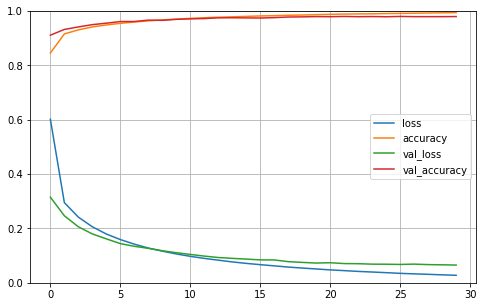

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9782


[0.070340096950531, 0.9782000184059143]

# New Section